# Churn Modelling with Artificial Neural Networks

This project demonstrates how to build and train an Artificial Neural Network (ANN) to predict customer churn using the Churn Modelling dataset.

**Dataset:**

The dataset contains information about bank customers and whether they have churned (exited the bank). The features include:

*   `RowNumber`, `CustomerId`, `Surname`: Identifiers (not used for training).
*   `CreditScore`, `Age`, `Tenure`, `Balance`, `NumOfProducts`, `HasCrCard`, `IsActiveMember`, `EstimatedSalary`: Numerical features.
*   `Geography`, `Gender`: Categorical features.
*   `Exited`: Target variable (1 if the customer churned, 0 otherwise).

**Libraries Used:**

*   **pandas:** For data loading and manipulation.
*   **numpy:** For numerical operations.
*   **matplotlib.pyplot:** For plotting the training history.
*   **tensorflow:** For building and training the ANN model.
*   **sklearn:** For data splitting, feature scaling, and evaluation metrics.

**Methodology:**

1.  **Data Loading and Exploration:** The dataset is loaded using pandas, and the first few rows are displayed to understand the data structure.
2.  **Feature Engineering:** Categorical features (`Geography` and `Gender`) are one-hot encoded using `pd.get_dummies`. The original categorical columns are dropped from the feature set.
3.  **Data Splitting:** The dataset is split into training and testing sets using `train_test_split` from `sklearn.model_selection`.
4.  **Feature Scaling:** Numerical features are scaled using `StandardScaler` from `sklearn.preprocessing` to ensure that all features have a similar range, which helps the ANN converge faster.
5.  **ANN Model Building:**
    *   A `Sequential` model is initialized from `tensorflow.keras.models`.
    *   `Dense` layers are added to the model. The first layer is the input layer, followed by hidden layers with `relu` activation. `Dropout` layers are included after the input layer to prevent overfitting.
    *   The output layer has a single unit with `sigmoid` activation, suitable for binary classification.
6.  **Model Compilation:** The model is compiled with the `Adam` optimizer, `binary_crossentropy` loss function (for binary classification), and `accuracy` as the evaluation metric.
7.  **Early Stopping:** `EarlyStopping` callback from `tensorflow.keras.callbacks` is used to monitor the validation loss and stop training if it stops improving, preventing overfitting.
8.  **Model Training:** The model is trained on the training data using the `fit` method. A validation split is used to monitor performance on unseen data during training.
9.  **Model Evaluation:**
    *   Predictions are made on the test set using the trained model.
    *   A confusion matrix is generated using `confusion_matrix` from `sklearn.metrics` to evaluate the model's performance.
    *   The accuracy score is calculated using `accuracy_score` from `sklearn.metrics`.
    *   Training history (accuracy and loss) is plotted to visualize the model's learning process.

This project provides a comprehensive example of applying ANNs to a real-world classification problem, including data preprocessing, model building, training, and evaluation.

In [1]:
pip install tensorflow

In [2]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
print("GPU Available:", tf.config.list_physical_devices('GPU'))

TensorFlow version: 2.19.0
GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [1]:
#import basic libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dataset = pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
## Divide the dataset into denpended and indipendent features
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [5]:
## ferature Engineering
geography = pd.get_dummies(X['Geography'], drop_first=True) #drop_first will give 2 column which give the all 3 data loke 00 01 10
gender = pd.get_dummies(X['Gender'], drop_first=True)

In [6]:
X.drop(['Geography', 'Gender'], axis=1, inplace=True)

In [7]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64
9996,516,35,10,57369.61,1,1,1,101699.77
9997,709,36,7,0.00,1,0,1,42085.58
9998,772,42,3,75075.31,2,1,0,92888.52


In [8]:
pd.concat([X, geography, gender], axis=1)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,True,False,True


In [9]:
## train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [10]:
##feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [11]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ...,  0.64259497,
        -1.03227043,  1.10643166],
       [-2.30455945,  0.30102557, -1.37744033, ...,  0.64259497,
         0.9687384 , -0.74866447],
       [-1.19119591, -0.94312892, -1.031415  , ...,  0.64259497,
        -1.03227043,  1.48533467],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ...,  0.64259497,
        -1.03227043,  1.41231994],
       [-0.62420521, -0.08179119,  1.39076231, ...,  0.64259497,
         0.9687384 ,  0.84432121],
       [-0.28401079,  0.87525072, -1.37744033, ...,  0.64259497,
        -1.03227043,  0.32472465]])

In [12]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  0.64259497,
         0.9687384 ,  1.61085707],
       [-1.31490297,  0.10961719, -1.031415  , ...,  0.64259497,
        -1.03227043,  0.49587037],
       [ 0.57162971,  0.30102557,  1.04473698, ...,  0.64259497,
         0.9687384 , -0.42478674],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ...,  0.64259497,
        -1.03227043,  0.71888467],
       [-0.00566991, -0.46460796, -0.33936434, ...,  0.64259497,
         0.9687384 , -1.54507805],
       [-0.79945688, -0.84742473,  1.04473698, ...,  0.64259497,
        -1.03227043,  1.61255917]])

In [13]:
  X_train.shape

(8000, 8)

In [15]:
##Part 2 Now create the ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, PReLU, ELU, ReLU
from tensorflow.keras.layers import Dropout

In [16]:
## lets initialize the ANN
classifier = Sequential()

## adding input layer
classifier.add(Dense(units=8, activation='relu'))

#adding dropout
classifier.add(Dropout(0.3))

In [17]:
# addding the first hidden layer
classifier.add(Dense(units=7, activation='relu'))

# addding the second hidden layer
classifier.add(Dense(units=6, activation='relu'))

In [18]:
#adding the output layer
classifier.add(Dense(units=1, activation='sigmoid'))

In [27]:
classifier.compile(optimizer=opt,  loss='binary_crossentropy', metrics=['accuracy'])

In [26]:
import tensorflow as tf
opt = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.95, epsilon=1e-07, amsgrad=False, name='Adam')

In [28]:
#Early Stopping
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [29]:
model_history = classifier.fit(X_train, y_train, validation_split=0.33, batch_size=10, epochs=1000, callbacks=early_stopping)

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8648 - loss: 0.3362 - val_accuracy: 0.8463 - val_loss: 0.3686
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8597 - loss: 0.3413 - val_accuracy: 0.8466 - val_loss: 0.3723
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8575 - loss: 0.3445 - val_accuracy: 0.8482 - val_loss: 0.3725
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8584 - loss: 0.3411 - val_accuracy: 0.8474 - val_loss: 0.3722
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8633 - loss: 0.3387 - val_accuracy: 0.8459 - val_loss: 0.3716
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8612 - loss: 0.3343 - val_accuracy: 0.8482 - val_loss: 0.3712
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8652 - loss: 0.3425 - val_accuracy: 0.8466 - val_loss: 0.3715
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8528 - loss: 0.3488 - 

In [24]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

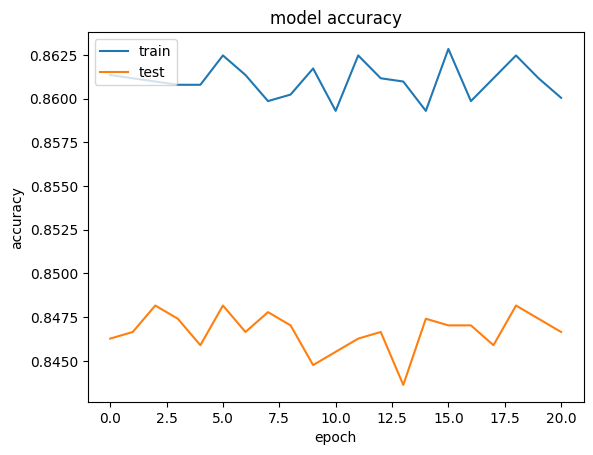

In [30]:
#summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

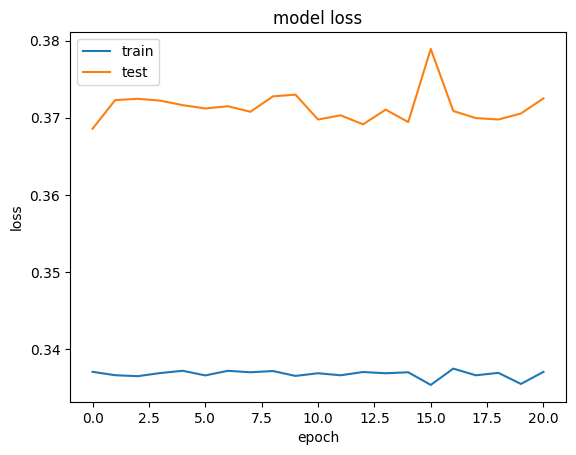

In [31]:
#summarize the loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [33]:
#part 3 - making the prediction and evauating the model

y_pred = classifier.predict(X_test)
y_pred = (y_pred  >= 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


In [34]:
# make the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [35]:
cm

array([[1549,   46],
       [ 217,  188]])

In [36]:
#Calculate accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)
score

0.8685